In [1]:
import pandas as pd

import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"

In [2]:
data = pd.read_csv('results_paper.csv')

OPTIMAL_BASE = {'TOU': 1021.9, 'RTP': 1338.4, 'PC': 331.5}
CNAME_MAPPING = {'MPC': 'MPC',
                 'MPC-C': 'MPC-C', 
                 'CPL': 'MPC-CL',
                 'DPC': 'DPC', 
                 'RLC': 'RLC', 
                 'RBC': 'RBC'}
SAVE_FIG = False

In [3]:
data

,controller_type,cost,dr_type,look_ahead,test_time
0,MPC-Oracle,1021.9,TOU,0,25.512032
1,RBC,1216.3,TOU,0,0.012068
2,DPC,1040.8,TOU,3,0.623462
3,DPC,1047.6,TOU,6,0.626185
4,DPC,1051.5,TOU,12,0.615763
...,...,...,...,...,...
70,CPL,739.6,PC,3,44.393015
71,RLC,1051.8,PC,3,1.579868
72,RLC,1073.0,PC,6,1.595971
73,RLC,702.9,PC,12,1.677363


In [4]:
def get_data(control_type, dr_type):

    data_specific = data[(data.controller_type == control_type) & (data.dr_type == dr_type)]
    results = [data_specific.test_time.to_list(),
               data_specific.cost.to_list()]
    
    return results

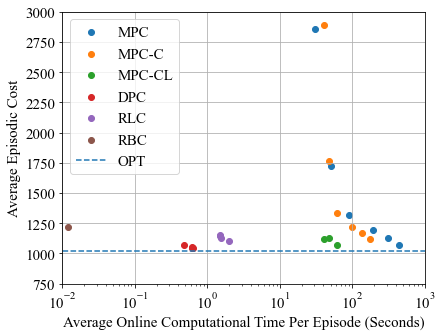

In [5]:
DR_TYPE = 'TOU'

fig, axes = plt.subplots(1, 1, figsize=(6.5, 5))

for controller in CNAME_MAPPING.keys():
    c_data = get_data(controller, DR_TYPE)
    plt.scatter(c_data[0], c_data[1], label=CNAME_MAPPING[controller])
    
plt.plot([0.001, 1000], [OPTIMAL_BASE[DR_TYPE], OPTIMAL_BASE[DR_TYPE]], linestyle='dashed', label='OPT')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Average Online Computational Time Per Episode (Seconds)', fontsize=15)
plt.ylabel('Average Episodic Cost', fontsize=15)
plt.grid()
plt.tick_params(labelsize=15)
plt.xlim([0.01, 1000])
plt.ylim([750, 3000])
plt.legend(fontsize=15, ncol=1, loc='upper left')

if SAVE_FIG:
    plt.savefig('online_computation_time_tou.png', dpi=200)